### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 14,145480,5426,72165
Mar 15,156421,5819,73917
Mar 16,172158,6652,78031
Mar 17,191914,7343,80347
Mar 18,204773,8156,82667


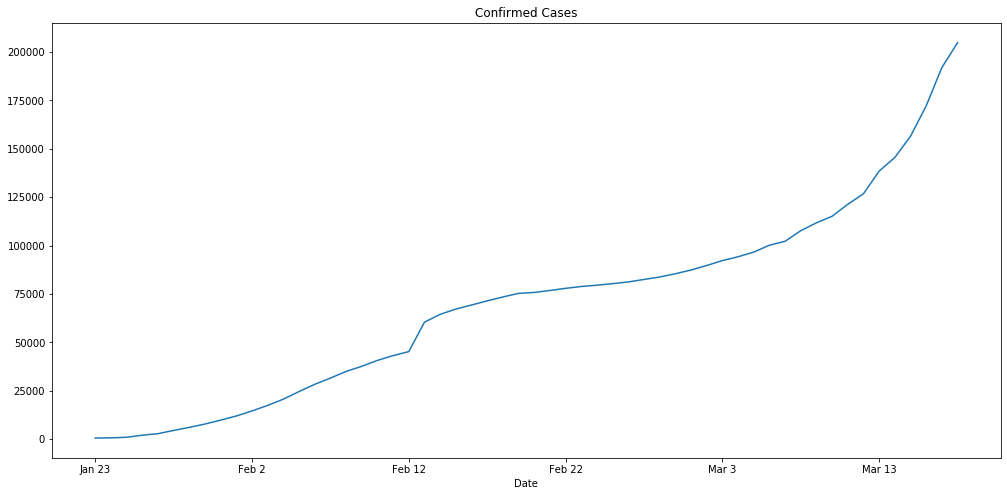

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

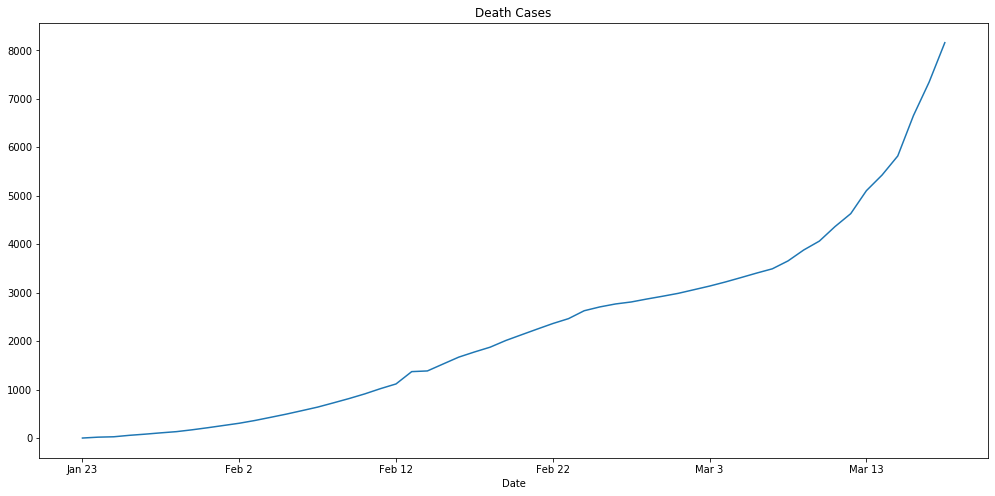

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

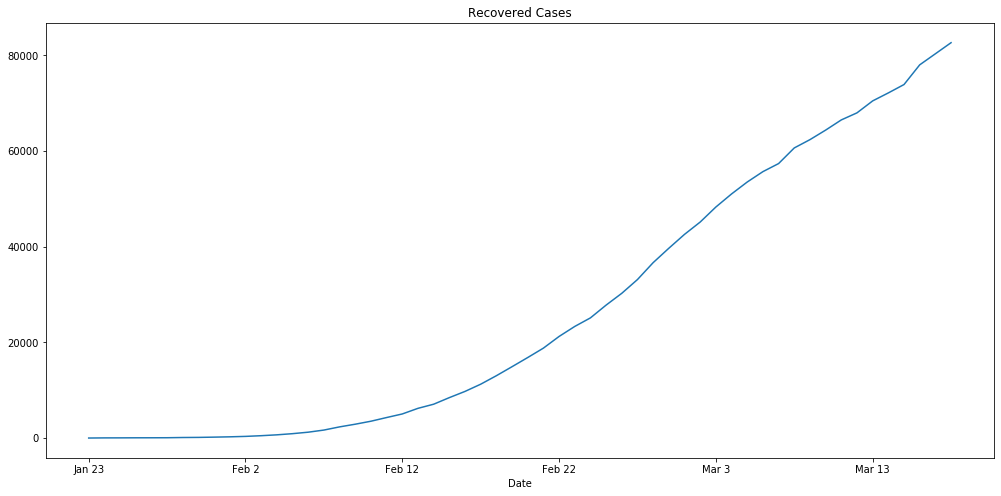

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

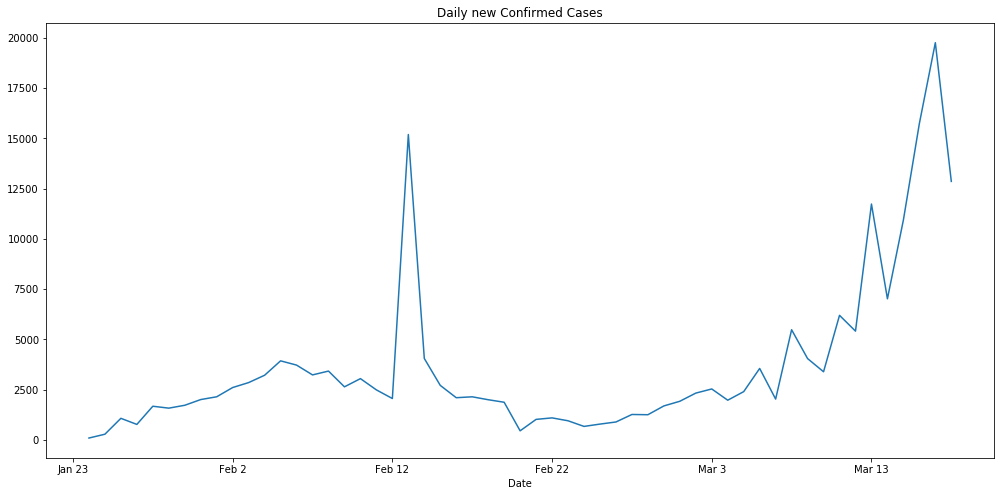

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

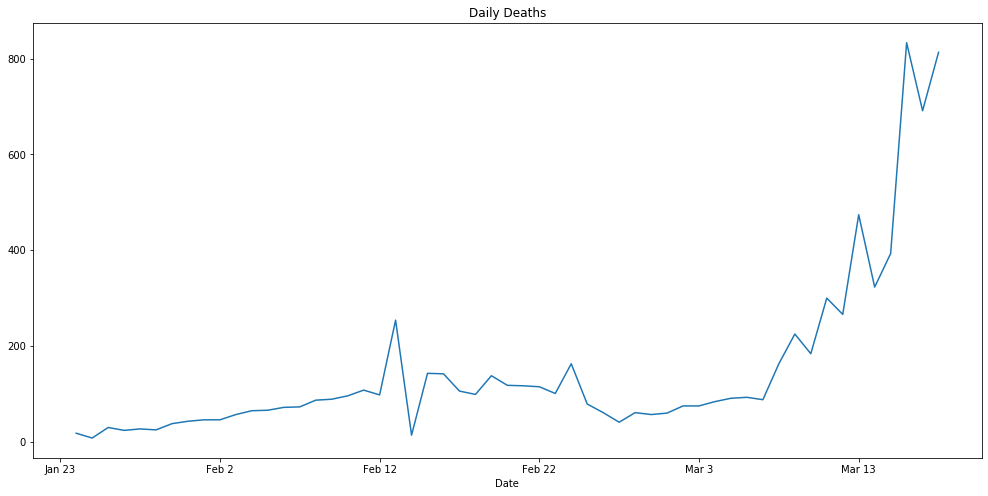

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

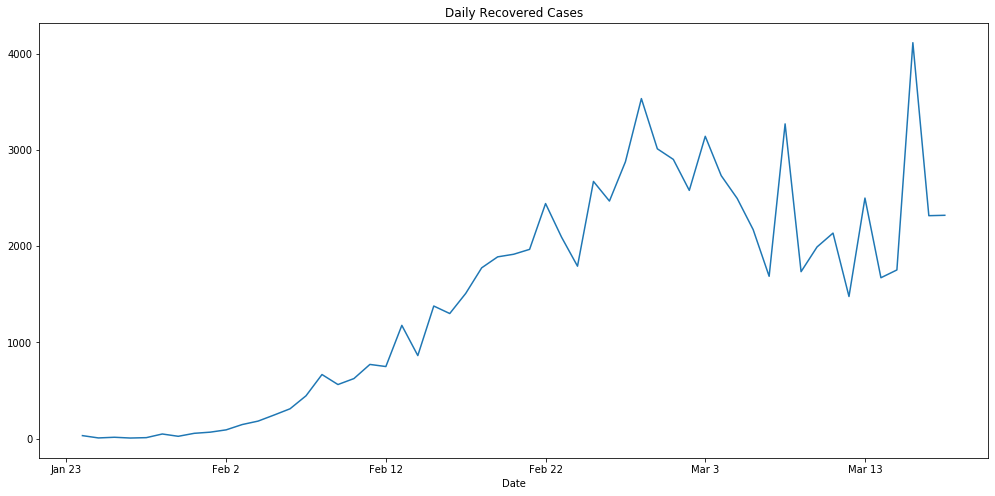

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1015.366, BIC=1027.300, Fit time=3.120 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1022.817, BIC=1026.795, Fit time=0.023 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1014.208, BIC=1020.175, Fit time=0.933 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1010.989, BIC=1016.956, Fit time=0.322 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1012.879, BIC=1020.835, Fit time=0.655 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1012.834, BIC=1020.790, Fit time=1.036 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1014.903, BIC=1024.848, Fit time=1.969 seconds
Total fit time: 8.145 seconds


In [15]:
confirmed_model.aic()

1010.9890263360405

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-19 - 219777
2020-03-20 - 235053
2020-03-21 - 250598
2020-03-22 - 266414
2020-03-23 - 282500
2020-03-24 - 298856
2020-03-25 - 315482
2020-03-26 - 332379
2020-03-27 - 349546
2020-03-28 - 366983
2020-03-29 - 384691
2020-03-30 - 402668
2020-03-31 - 420916
2020-04-01 - 439435
2020-04-02 - 458223


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=628.469, BIC=640.403, Fit time=1.913 seconds
Fit ARIMA: order=(0, 2, 0); AIC=642.266, BIC=646.244, Fit time=0.030 seconds
Fit ARIMA: order=(1, 2, 0); AIC=632.236, BIC=638.203, Fit time=0.326 seconds
Fit ARIMA: order=(0, 2, 1); AIC=633.936, BIC=639.903, Fit time=0.378 seconds
Fit ARIMA: order=(1, 2, 2); AIC=624.905, BIC=634.850, Fit time=3.970 seconds
Fit ARIMA: order=(1, 2, 1); AIC=633.783, BIC=641.739, Fit time=0.582 seconds
Fit ARIMA: order=(1, 2, 3); AIC=626.369, BIC=638.303, Fit time=1.441 seconds
Fit ARIMA: order=(2, 2, 3); AIC=636.291, BIC=650.214, Fit time=3.234 seconds
Fit ARIMA: order=(0, 2, 2); AIC=628.904, BIC=636.860, Fit time=0.514 seconds
Total fit time: 12.450 seconds


In [20]:
deaths_model.aic()

624.9048592899389

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-19 - 9008
2020-03-20 - 9983
2020-03-21 - 11080
2020-03-22 - 12300
2020-03-23 - 13641
2020-03-24 - 15104
2020-03-25 - 16690
2020-03-26 - 18397
2020-03-27 - 20225
2020-03-28 - 22175
2020-03-29 - 24247
2020-03-30 - 26440
2020-03-31 - 28753
2020-04-01 - 31188
2020-04-02 - 33744


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=849.025, BIC=853.003, Fit time=0.014 seconds
Fit ARIMA: order=(1, 2, 0); AIC=834.305, BIC=840.272, Fit time=0.366 seconds
Fit ARIMA: order=(0, 2, 1); AIC=827.917, BIC=833.884, Fit time=0.199 seconds
Fit ARIMA: order=(1, 2, 1); AIC=828.256, BIC=836.212, Fit time=0.398 seconds
Fit ARIMA: order=(0, 2, 2); AIC=826.340, BIC=834.296, Fit time=0.304 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 3); AIC=826.164, BIC=836.109, Fit time=0.598 seconds
Fit ARIMA: order=(1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 4); AIC=823.182, BIC=835.116, Fit time=1.014 seconds
Fit ARIMA: order=(1, 2, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 5); AIC=824.540, BIC=838.462, Fit time=1.699 seconds
Total fit time: 4.884 seconds


In [25]:
recovered_model.aic()

823.1819601103207

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-19 - 86296
2020-03-20 - 89247
2020-03-21 - 92261
2020-03-22 - 95368
2020-03-23 - 98528
2020-03-24 - 101742
2020-03-25 - 105010
2020-03-26 - 108332
2020-03-27 - 111707
2020-03-28 - 115136
2020-03-29 - 118619
2020-03-30 - 122155
2020-03-31 - 125745
2020-04-01 - 129389
2020-04-02 - 133087
